# ENDEPORTE-EDA Parte 2

MINE-4101: Applied Data Science  
Universidad de los Andes  
  
**Datasets:** : ultimo_semestre.csv


**Business Context:** Se requiere conocer que variables mas inciden sobre la desercion academica.

**Restricciones:** Se tiene la variable 'target' con los valores 1:no-retirados y 0:retirados

## 1. Preparación

### Librerias

In [1]:
# Importar bibliotecas

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import networkx as nx

from IPython.display import Image, display

In [2]:
# Bibliotecas modelos
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### Importar datos

In [3]:
# Cargar los datos del json
df_demograficos = pd.read_excel('./data/Demograficos.xlsx')
df_historico = pd.read_excel('./data/HistoricoNotas.xlsx')

## 2. Entendimiento de los conjuntos de datos

In [4]:
#Vista previa de los datos

print("Datos Demograficos DataFrame")
display(df_demograficos.head())  

print("Historico de clases DataFrame")
display(df_historico.head())  

Datos Demograficos DataFrame


PERIODO_ACAENICO       CODIGO                        UNIDAD  CODIGOPROGRAMA  \
0         2017 - 2  53212132001  ESCUELA NACIONAL DEL DEPORTE           53212   
1         2017 - 2   7306132001  ESCUELA NACIONAL DEL DEPORTE            7306   
2         2017 - 2   7306131002  ESCUELA NACIONAL DEL DEPORTE            7306   
3         2017 - 2  53212162577  ESCUELA NACIONAL DEL DEPORTE           53212   
4         2017 - 2  53212171151  ESCUELA NACIONAL DEL DEPORTE           53212   

       PROGRAMA  SEMESTRE  PROMEDIOSEMESTRE     GENERO FECHANACIMIENTO  \
0       DEPORTE         8               4.4  Masculino      02-04-1996   
1  FISIOTERAPIA         8               3.3   Femenino      01-08-1990   
2  FISIOTERAPIA        10               4.5   Femenino      14-08-1994   
3       DEPORTE         3               3.4  Masculino      15-07-1997   
4       DEPORTE         2               3.6  Masculino      24-03-1999   

   ESTRATO  ... IDDEPARTAMENTONACIMIENTO DEPARTAMENTONACIMIENTO SISBEN  \
0      3.0  ...                     76.0        VALLE DEL CAUCA    0.0   
1      2.0  ...                     76.0        VALLE DEL CAUCA    0.0   
2      2.0  ...                     76.0        VALLE DEL CAUCA    0.0   
3      3.0  ...                     76.0        VALLE DEL CAUCA    0.0   
4      3.0  ...                     76.0        VALLE DEL CAUCA    0.0   

   NIVELSISBEN CANTIDAD  PERIODO EDAD2                     EDAD      FACULTAD  \
0          NaN        1  2017-II    21  Edad entre 18 y 25 años  Fac. Deporte   
1          NaN        1  2017-II    27  Edad entre 26 y 33 años    Fac. Salud   
2          NaN        1  2017-II    23  Edad entre 18 y 25 años    Fac. Salud   
3          NaN        1  2017-II    20  Edad entre 18 y 25 años  Fac. Deporte   
4          NaN        1  2017-II    18  Edad entre 18 y 25 años  Fac. Deporte   

  NIVEL_FORMACION  
0  Universitrario  
1  Universitrario  
2  Universitrario  
3  Universitrario  
4  Universitrario  

[5 rows x 33 columns]

Historico de clases DataFrame


CODIGO                                       CURSO    Nota_Definitiva  \
0  9010602  E.C I (NEGOCIACIÓN Y MANEJO DE CONFLICTOS)                  A   
1    90106                   ELECTIVA COMPLEMENTARIA I  5.0 - CINCO. CERO   
2  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   
3  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   
4  9020601    E.C. II (LIDERAZGO Y TOMA DE DECISIONES)                  A   

  Aprobado  Creditos Periodo  Semestre Cuenta para Promedio        TIPO  \
0       SI         2  2018-2         1                   NO      NORMAL   
1       SI         2  2018-2         1                   NO      NORMAL   
2       SI         2  2019-1         2                   NO      NORMAL   
3       SI         2  2020-1         2                   NO      NORMAL   
4       SI         2  2020-1         2                   NO  VALIDACIÓN   

  CODIGOMATRICULA              PENSUM                    PROGRAMA  
0     90555141017  ADM 20112 PENSUM A  ADMINISTRACION DE EMPRESAS  
1     90555141017  ADM 20112 PENSUM A  ADMINISTRACION DE EMPRESAS  
2     90555122002  ADM 20112 PENSUM A  ADMINISTRACION DE EMPRESAS  
3     90555151012  ADM 20112 PENSUM A  ADMINISTRACION DE EMPRESAS  
4     90555151024  ADM 20112 PENSUM A  ADMINISTRACION DE EMPRESAS

In [5]:
# Revisar el tamaño de los dataframes
print("Shape of df_demograficos:", df_demograficos.shape)
print("Shape of df_historico:", df_historico.shape)

Shape of df_demograficos: (55419, 33)
Shape of df_historico: (418031, 12)


In [6]:
# Revisar las columnas de los dataframes y el tipo de datos
print("Data types in demograficos:")
print(df_demograficos.dtypes)

print("\nData types in historico notas:")
print(df_historico.dtypes)

Data types in demograficos:
PERIODO_ACAENICO             object
CODIGO                       object
UNIDAD                       object
CODIGOPROGRAMA                int64
PROGRAMA                     object
SEMESTRE                      int64
PROMEDIOSEMESTRE            float64
GENERO                       object
FECHANACIMIENTO              object
ESTRATO                     float64
CIUDADRESIDENCIA             object
DEPARTAMENTORESICEDENCIA     object
ESTADOCIVIL                  object
PROMEDIOGENERAL             float64
SITUACION_ACTUAL             object
CATEGORIA_ACTUAL             object
SITUACION_DEL_PERIODO        object
CATEGORIA_DEL_PERIODO        object
DISCAPACIDAD                 object
TIPO_DISCAPACIDAD            object
FECHA_MATRICULA              object
IDCIUDADNACIMIENTO          float64
CIUDADNACIMIENTO             object
IDDEPARTAMENTONACIMIENTO    float64
DEPARTAMENTONACIMIENTO       object
SISBEN                      float64
NIVELSISBEN                 float64


## 3. Preparación de los datos

Dado el enfoque del problema se tomara solo el ultimo registro de cada estudiante para el analisis. Adicionalmente, nos enfocaremos en los estudiantes de pregrado siguiendo las indicaciones del cliente. 

In [7]:
# Excluir filas donde la columna PROGRAMA comience con "especializacion" o "especialización" (independiente de mayúsculas y con/sin tilde)
df_demograficos = df_demograficos[~df_demograficos['PROGRAMA'].str.lower().str.startswith(('especializacion', 'especialización'))]

# Verificar la operación
df_demograficos['PROGRAMA'].unique()


array(['DEPORTE', 'FISIOTERAPIA', 'TECNOLOGIA EN DEPORTE',
       'NUTRICION Y DIETETICA', 'TERAPIA OCUPACIONAL',
       'ADMINISTRACION DE EMPRESAS', 'TECNOLOGÍA EN GESTIÓN DEPORTIVA',
       'MERCADEO Y NEGOCIOS INTERNACIONALES'], dtype=object)

In [8]:
df_demograficos['PROGRAMA'].value_counts()

PROGRAMA
DEPORTE                                16441
FISIOTERAPIA                           13997
NUTRICION Y DIETETICA                   8047
ADMINISTRACION DE EMPRESAS              5614
TECNOLOGIA EN DEPORTE                   4594
TERAPIA OCUPACIONAL                     3507
MERCADEO Y NEGOCIOS INTERNACIONALES      416
TECNOLOGÍA EN GESTIÓN DEPORTIVA          400
Name: count, dtype: int64

In [9]:
# Función para extraer el año y el periodo de la columna PERIODO_ACAENICO
def extraer_anio_periodo(periodo):
    match = re.match(r"(\d{4}) - (\d)", periodo)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

# Aplicar la función para crear dos nuevas columnas con el año y el periodo
df_demograficos[['ANIO', 'PERIODO']] = df_demograficos['PERIODO_ACAENICO'].apply(lambda x: pd.Series(extraer_anio_periodo(x)))

# Ordenar por CODIGO, ANIO y PERIODO, y eliminar duplicados dejando el más reciente
df_demograficos = df_demograficos.sort_values(['CODIGO', 'ANIO', 'PERIODO']).drop_duplicates('CODIGO', keep='last')

# Eliminar las columnas auxiliares si no son necesarias
df_demograficos = df_demograficos.drop(columns=['ANIO', 'PERIODO'])

df_demograficos.shape


(10025, 32)

In [10]:
print("Datos Demograficos DataFrame")
display(df_demograficos.head())  

Datos Demograficos DataFrame


PERIODO_ACAENICO        CODIGO                        UNIDAD  \
2             2017 - 2    7306131002  ESCUELA NACIONAL DEL DEPORTE   
25020         2020 - 2    7306202091  ESCUELA NACIONAL DEL DEPORTE   
497           2017 - 2   53212172423  ESCUELA NACIONAL DEL DEPORTE   
7757          2018 - 1   90555172061  ESCUELA NACIONAL DEL DEPORTE   
3709          2017 - 1  102383132002  ESCUELA NACIONAL DEL DEPORTE   

       CODIGOPROGRAMA                    PROGRAMA  SEMESTRE  PROMEDIOSEMESTRE  \
2                7306                FISIOTERAPIA        10               4.5   
25020            7306                FISIOTERAPIA         1               4.4   
497             53212                     DEPORTE         1               3.7   
7757            90555  ADMINISTRACION DE EMPRESAS         2               3.5   
3709           102383       NUTRICION Y DIETETICA         8               3.9   

          GENERO FECHANACIMIENTO  ESTRATO  ... CIUDADNACIMIENTO  \
2       Femenino      14-08-1994      2.0  ...          PALMIRA   
25020  Masculino      22-06-2002      3.0  ...             CALI   
497    Masculino      31-08-1998      3.0  ...          PALMIRA   
7757   Masculino      07-10-1999      2.0  ...             CALI   
3709   Masculino      18-07-1995      3.0  ...             CALI   

      IDDEPARTAMENTONACIMIENTO DEPARTAMENTONACIMIENTO  SISBEN NIVELSISBEN  \
2                         76.0        VALLE DEL CAUCA     0.0         NaN   
25020                     76.0        VALLE DEL CAUCA     0.0         NaN   
497                       76.0        VALLE DEL CAUCA     0.0         NaN   
7757                      76.0        VALLE DEL CAUCA     0.0         NaN   
3709                      76.0        VALLE DEL CAUCA     0.0         NaN   

      CANTIDAD EDAD2                     EDAD      FACULTAD NIVEL_FORMACION  
2            1    23  Edad entre 18 y 25 años    Fac. Salud  Universitrario  
25020        1    18  Edad entre 18 y 25 años    Fac. Salud  Universitrario  
497          1    19  Edad entre 18 y 25 años  Fac. Deporte  Universitrario  
7757         1    18  Edad entre 18 y 25 años    Fac. Admon  Universitrario  
3709         1    22  Edad entre 18 y 25 años    Fac. Salud  Universitrario  

[5 rows x 32 columns]

Ahora, adaptaemos la variable de interes para que nos refleje una variable objetivo que podamos utilizar que tenga sentido del problema. Extrayendo de la información del estado del estudiante extraeeremos los que han desertado y los que no.

In [11]:
# Creación de la variable de interés DESERCION
df_demograficos['DESERCION'] = df_demograficos.apply(
    lambda row: "Desercion" 
                if row['SITUACION_ACTUAL'] in ['EXCLUIDO NO RENOVACION DE MATRICULA', 'RETIRO DEFINITIVO', 'EXCLUIDO CANCELACION SEMESTRE'] 
                and row['CATEGORIA_ACTUAL'] not in ['CONTINUIDAD ACADEMICA - EGRESADO', 'REINGRESO'] 
                else "No desercion", axis=1)

# Mostrar los primeros registros
df_demograficos.head()

PERIODO_ACAENICO        CODIGO                        UNIDAD  \
2             2017 - 2    7306131002  ESCUELA NACIONAL DEL DEPORTE   
25020         2020 - 2    7306202091  ESCUELA NACIONAL DEL DEPORTE   
497           2017 - 2   53212172423  ESCUELA NACIONAL DEL DEPORTE   
7757          2018 - 1   90555172061  ESCUELA NACIONAL DEL DEPORTE   
3709          2017 - 1  102383132002  ESCUELA NACIONAL DEL DEPORTE   

       CODIGOPROGRAMA                    PROGRAMA  SEMESTRE  PROMEDIOSEMESTRE  \
2                7306                FISIOTERAPIA        10               4.5   
25020            7306                FISIOTERAPIA         1               4.4   
497             53212                     DEPORTE         1               3.7   
7757            90555  ADMINISTRACION DE EMPRESAS         2               3.5   
3709           102383       NUTRICION Y DIETETICA         8               3.9   

          GENERO FECHANACIMIENTO  ESTRATO  ... IDDEPARTAMENTONACIMIENTO  \
2       Femenino      14-08-1994      2.0  ...                     76.0   
25020  Masculino      22-06-2002      3.0  ...                     76.0   
497    Masculino      31-08-1998      3.0  ...                     76.0   
7757   Masculino      07-10-1999      2.0  ...                     76.0   
3709   Masculino      18-07-1995      3.0  ...                     76.0   

      DEPARTAMENTONACIMIENTO SISBEN  NIVELSISBEN CANTIDAD EDAD2  \
2            VALLE DEL CAUCA    0.0          NaN        1    23   
25020        VALLE DEL CAUCA    0.0          NaN        1    18   
497          VALLE DEL CAUCA    0.0          NaN        1    19   
7757         VALLE DEL CAUCA    0.0          NaN        1    18   
3709         VALLE DEL CAUCA    0.0          NaN        1    22   

                          EDAD      FACULTAD NIVEL_FORMACION     DESERCION  
2      Edad entre 18 y 25 años    Fac. Salud  Universitrario  No desercion  
25020  Edad entre 18 y 25 años    Fac. Salud  Universitrario  No desercion  
497    Edad entre 18 y 25 años  Fac. Deporte  Universitrario  No desercion  
7757   Edad entre 18 y 25 años    Fac. Admon  Universitrario  No desercion  
3709   Edad entre 18 y 25 años    Fac. Salud  Universitrario  No desercion  

[5 rows x 33 columns]

In [12]:
df_demograficos["DESERCION"].value_counts()

DESERCION
No desercion    8901
Desercion       1124
Name: count, dtype: int64

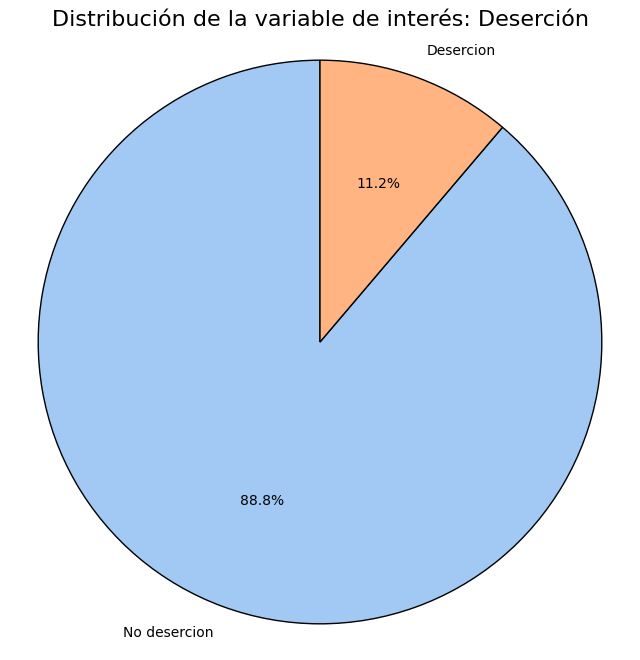

In [13]:
# Contar las ocurrencias de cada categoría en la variable de interés
desercion_counts = df_demograficos['DESERCION'].value_counts()

# Colores para la gráfica
colors = sns.color_palette("pastel")

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(desercion_counts, labels=desercion_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Añadir título
plt.title('Distribución de la variable de interés: Deserción', fontsize=16)

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

# Mostrar el gráfico
plt.show()


## 4. Analisis de calidad de datos

Revisamos la existencia de registros duplicados.

In [14]:
duplicates = df_demograficos.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Datos faltantes

In [15]:
# Buscar valores faltantes
missing_values = df_demograficos.isnull().sum()
display(missing_values[missing_values > 0])

ESTRATO                        6
CIUDADRESIDENCIA             143
DEPARTAMENTORESICEDENCIA     143
ESTADOCIVIL                   21
DISCAPACIDAD                   1
TIPO_DISCAPACIDAD              1
IDCIUDADNACIMIENTO            58
CIUDADNACIMIENTO              58
IDDEPARTAMENTONACIMIENTO      58
DEPARTAMENTONACIMIENTO        58
SISBEN                        14
NIVELSISBEN                 7943
dtype: int64

In [16]:
# Eliminar la columna NIVELSISBEN por la cantidad de nulos
df_demograficos = df_demograficos.drop(columns=['NIVELSISBEN'])


In [17]:
# Eliminar registros con nulos en las columnas especificadas
columnas_nulos = [
    'ESTRATO', 'CIUDADNACIMIENTO', 'DEPARTAMENTONACIMIENTO', 
    'SISBEN', 'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA', 
    'DISCAPACIDAD', 'TIPO_DISCAPACIDAD', 'ESTADOCIVIL'
]

df_demograficos = df_demograficos.dropna(subset=columnas_nulos)


In [18]:
# Buscar valores faltantes
missing_values = df_demograficos.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

Los nulos restantes son en columnas que tienen la informacion en otra columna.

## 5. Selección de caracteristicas

In [19]:
print("Data types in demograficos:")
print(df_demograficos.dtypes)

Data types in demograficos:
PERIODO_ACAENICO             object
CODIGO                       object
UNIDAD                       object
CODIGOPROGRAMA                int64
PROGRAMA                     object
SEMESTRE                      int64
PROMEDIOSEMESTRE            float64
GENERO                       object
FECHANACIMIENTO              object
ESTRATO                     float64
CIUDADRESIDENCIA             object
DEPARTAMENTORESICEDENCIA     object
ESTADOCIVIL                  object
PROMEDIOGENERAL             float64
SITUACION_ACTUAL             object
CATEGORIA_ACTUAL             object
SITUACION_DEL_PERIODO        object
CATEGORIA_DEL_PERIODO        object
DISCAPACIDAD                 object
TIPO_DISCAPACIDAD            object
FECHA_MATRICULA              object
IDCIUDADNACIMIENTO          float64
CIUDADNACIMIENTO             object
IDDEPARTAMENTONACIMIENTO    float64
DEPARTAMENTONACIMIENTO       object
SISBEN                      float64
CANTIDAD                      int64


Feature ranking:
1. PROMEDIOSEMESTRE (0.1755)
2. SEMESTRE (0.1522)
3. PROMEDIOGENERAL (0.1340)
4. EDAD2 (0.1294)
5. ESTRATO (0.0685)
6. PROGRAMA (0.0644)
7. CIUDADNACIMIENTO (0.0638)
8. CIUDADRESIDENCIA (0.0478)
9. FACULTAD (0.0279)
10. DEPARTAMENTONACIMIENTO (0.0274)
11. SISBEN (0.0271)
12. GENERO (0.0257)
13. DISCAPACIDAD (0.0174)
14. TIPO_DISCAPACIDAD (0.0128)
15. DEPARTAMENTORESICEDENCIA (0.0118)
16. ESTADOCIVIL (0.0101)
17. UNIDAD (0.0041)


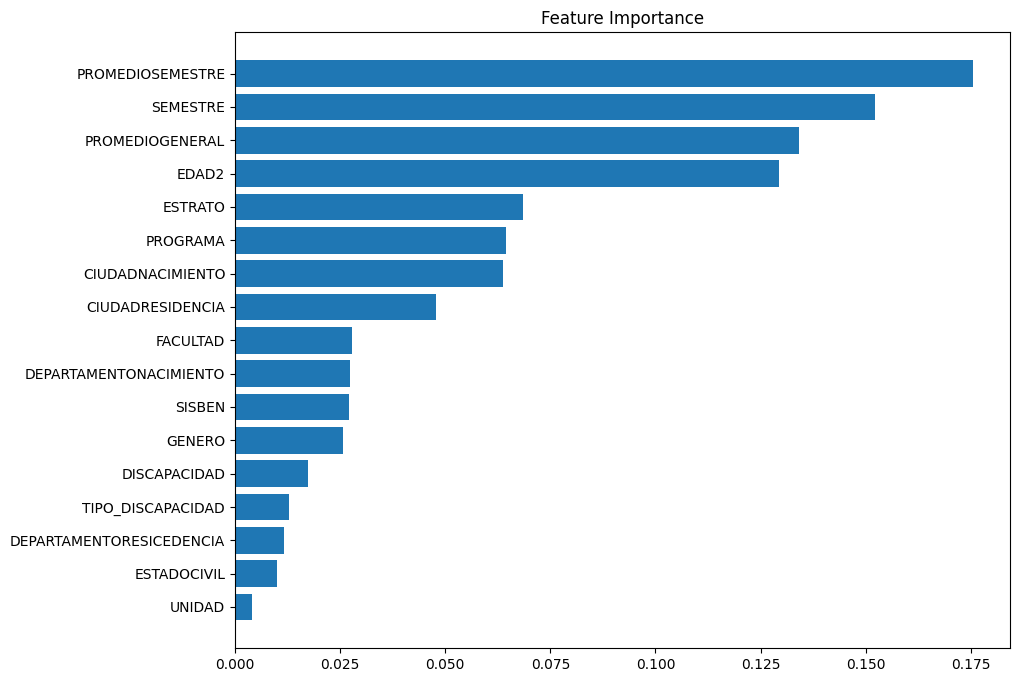

In [20]:
def tree_importance(df, target_var="DESERCION"):
    # Crear una copia del DataFrame
    df = df.copy()

    # Codificar las columnas categóricas
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    # Definir características (X) y variable objetivo (y)
    X = df.drop(columns=target_var)
    y = df[target_var]

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Entrenar un modelo Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Obtener la importancia de las características
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Imprimir la clasificación de las características
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

    # Graficar la importancia de las características
    plt.figure(figsize=(10, 8))
    plt.title("Feature Importance")
    plt.barh(range(X_train.shape[1]), importances[indices], align="center")
    plt.yticks(range(X_train.shape[1]), X.columns[indices])
    plt.gca().invert_yaxis()
    plt.show()

    return df

# Excluir columnas no necesarias
exclude = [
    "NIVEL_FORMACION", "EDAD", "PERIODO_ACAENICO", "CANTIDAD", "IDDEPARTAMENTONACIMIENTO", 
    "IDCIUDADNACIMIENTO", "FECHA_MATRICULA", "CATEGORIA_DEL_PERIODO", 
    "SITUACION_DEL_PERIODO", "CATEGORIA_ACTUAL", "SITUACION_ACTUAL", 
    "FECHANACIMIENTO", "CODIGOPROGRAMA", "CODIGO"
]

# Crear una copia del DataFrame original
df_copy = df_demograficos.copy()

# Eliminar las columnas excluidas
for i in exclude:
    df_copy.drop(columns=[i], inplace=True)

# Ejecutar el modelo de Random Forest
df_copy = tree_importance(df_copy)


In [21]:
def show_corr_target(df, target_var="DESERCION"):
    # Paso 1: Calcular la matriz de correlación
    corr_matrix = df.corr()

    # Paso 2: Aplanar la matriz de correlación y mantener los pares de columnas
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Solo la parte superior (evitar duplicados)
        .stack()  # Convertir a formato largo
        .reset_index()  # Convertir índice a columnas
    )

    corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

    # Paso 3: Ordenar por el valor absoluto de la correlación
    corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
    sorted_corr = corr_pairs[
        (corr_pairs['Column 1'] == target_var) | (corr_pairs['Column 2'] == target_var)
    ].sort_values(by='Abs Correlation', ascending=False)[:30]

    # Paso 4: Mostrar los mejores resultados
    print(sorted_corr)

# Ejecutar la función
show_corr_target(df_copy)


                     Column 1   Column 2  Correlation  Abs Correlation
47                   SEMESTRE  DESERCION     0.331837         0.331837
61           PROMEDIOSEMESTRE  DESERCION     0.132947         0.132947
124           PROMEDIOGENERAL  DESERCION     0.096324         0.096324
74                     GENERO  DESERCION    -0.071686         0.071686
151                     EDAD2  DESERCION     0.059729         0.059729
152                  FACULTAD  DESERCION     0.053041         0.053041
86                    ESTRATO  DESERCION    -0.041247         0.041247
137         TIPO_DISCAPACIDAD  DESERCION     0.029189         0.029189
97           CIUDADRESIDENCIA  DESERCION     0.028729         0.028729
16                     UNIDAD  DESERCION     0.025007         0.025007
142          CIUDADNACIMIENTO  DESERCION     0.022852         0.022852
131              DISCAPACIDAD  DESERCION     0.015744         0.015744
107  DEPARTAMENTORESICEDENCIA  DESERCION    -0.014351         0.014351
116   

In [22]:
def show_corr(df):
    # Paso 1: Calcular la matriz de correlación
    corr_matrix = df.corr()

    # Paso 2: Aplanar la matriz de correlación y mantener los pares de columnas
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Solo la parte superior (evitar duplicados)
        .stack()  # Convertir a formato largo
        .reset_index()  # Convertir índice a columnas
    )

    corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

    # Paso 3: Ordenar por el valor absoluto de la correlación
    corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
    sorted_corr = corr_pairs.sort_values(by='Abs Correlation', ascending=False)[:30]

    # Paso 4: Mostrar los mejores resultados
    print(sorted_corr)

# Ejecutar la función
show_corr(df_copy)


                     Column 1                  Column 2  Correlation  \
53           PROMEDIOSEMESTRE           PROMEDIOGENERAL     0.797302   
92           CIUDADRESIDENCIA          CIUDADNACIMIENTO     0.656405   
103  DEPARTAMENTORESICEDENCIA    DEPARTAMENTONACIMIENTO     0.580644   
33                   SEMESTRE          PROMEDIOSEMESTRE     0.515750   
125              DISCAPACIDAD         TIPO_DISCAPACIDAD     0.474025   
87           CIUDADRESIDENCIA  DEPARTAMENTORESICEDENCIA    -0.417982   
31                   PROGRAMA                  FACULTAD     0.414799   
39                   SEMESTRE           PROMEDIOGENERAL     0.405830   
138          CIUDADNACIMIENTO    DEPARTAMENTONACIMIENTO    -0.348621   
47                   SEMESTRE                 DESERCION     0.331837   
102  DEPARTAMENTORESICEDENCIA          CIUDADNACIMIENTO    -0.330029   
73                     GENERO                  FACULTAD    -0.306988   
6                      UNIDAD  DEPARTAMENTORESICEDENCIA     0.29

In [23]:
df_extracted = df_demograficos[['DESERCION', 'PROGRAMA', 'SEMESTRE', 'PROMEDIOSEMESTRE', 'GENERO', 
                                'ESTRATO', 'CIUDADRESIDENCIA', 'PROMEDIOGENERAL', 
                                'CIUDADNACIMIENTO', 'EDAD2']]

df_extracted.head()


DESERCION                    PROGRAMA  SEMESTRE  PROMEDIOSEMESTRE  \
2      No desercion                FISIOTERAPIA        10               4.5   
25020  No desercion                FISIOTERAPIA         1               4.4   
497    No desercion                     DEPORTE         1               3.7   
7757   No desercion  ADMINISTRACION DE EMPRESAS         2               3.5   
3709   No desercion       NUTRICION Y DIETETICA         8               3.9   

          GENERO  ESTRATO CIUDADRESIDENCIA  PROMEDIOGENERAL CIUDADNACIMIENTO  \
2       Femenino      2.0          PALMIRA              4.0          PALMIRA   
25020  Masculino      3.0          PALMIRA              4.4             CALI   
497    Masculino      3.0          PALMIRA              3.7          PALMIRA   
7757   Masculino      2.0     BUENAVENTURA              3.6             CALI   
3709   Masculino      3.0             CALI              4.0             CALI   

       EDAD2  
2         23  
25020     18  
497       19  
7757      18  
3709      22

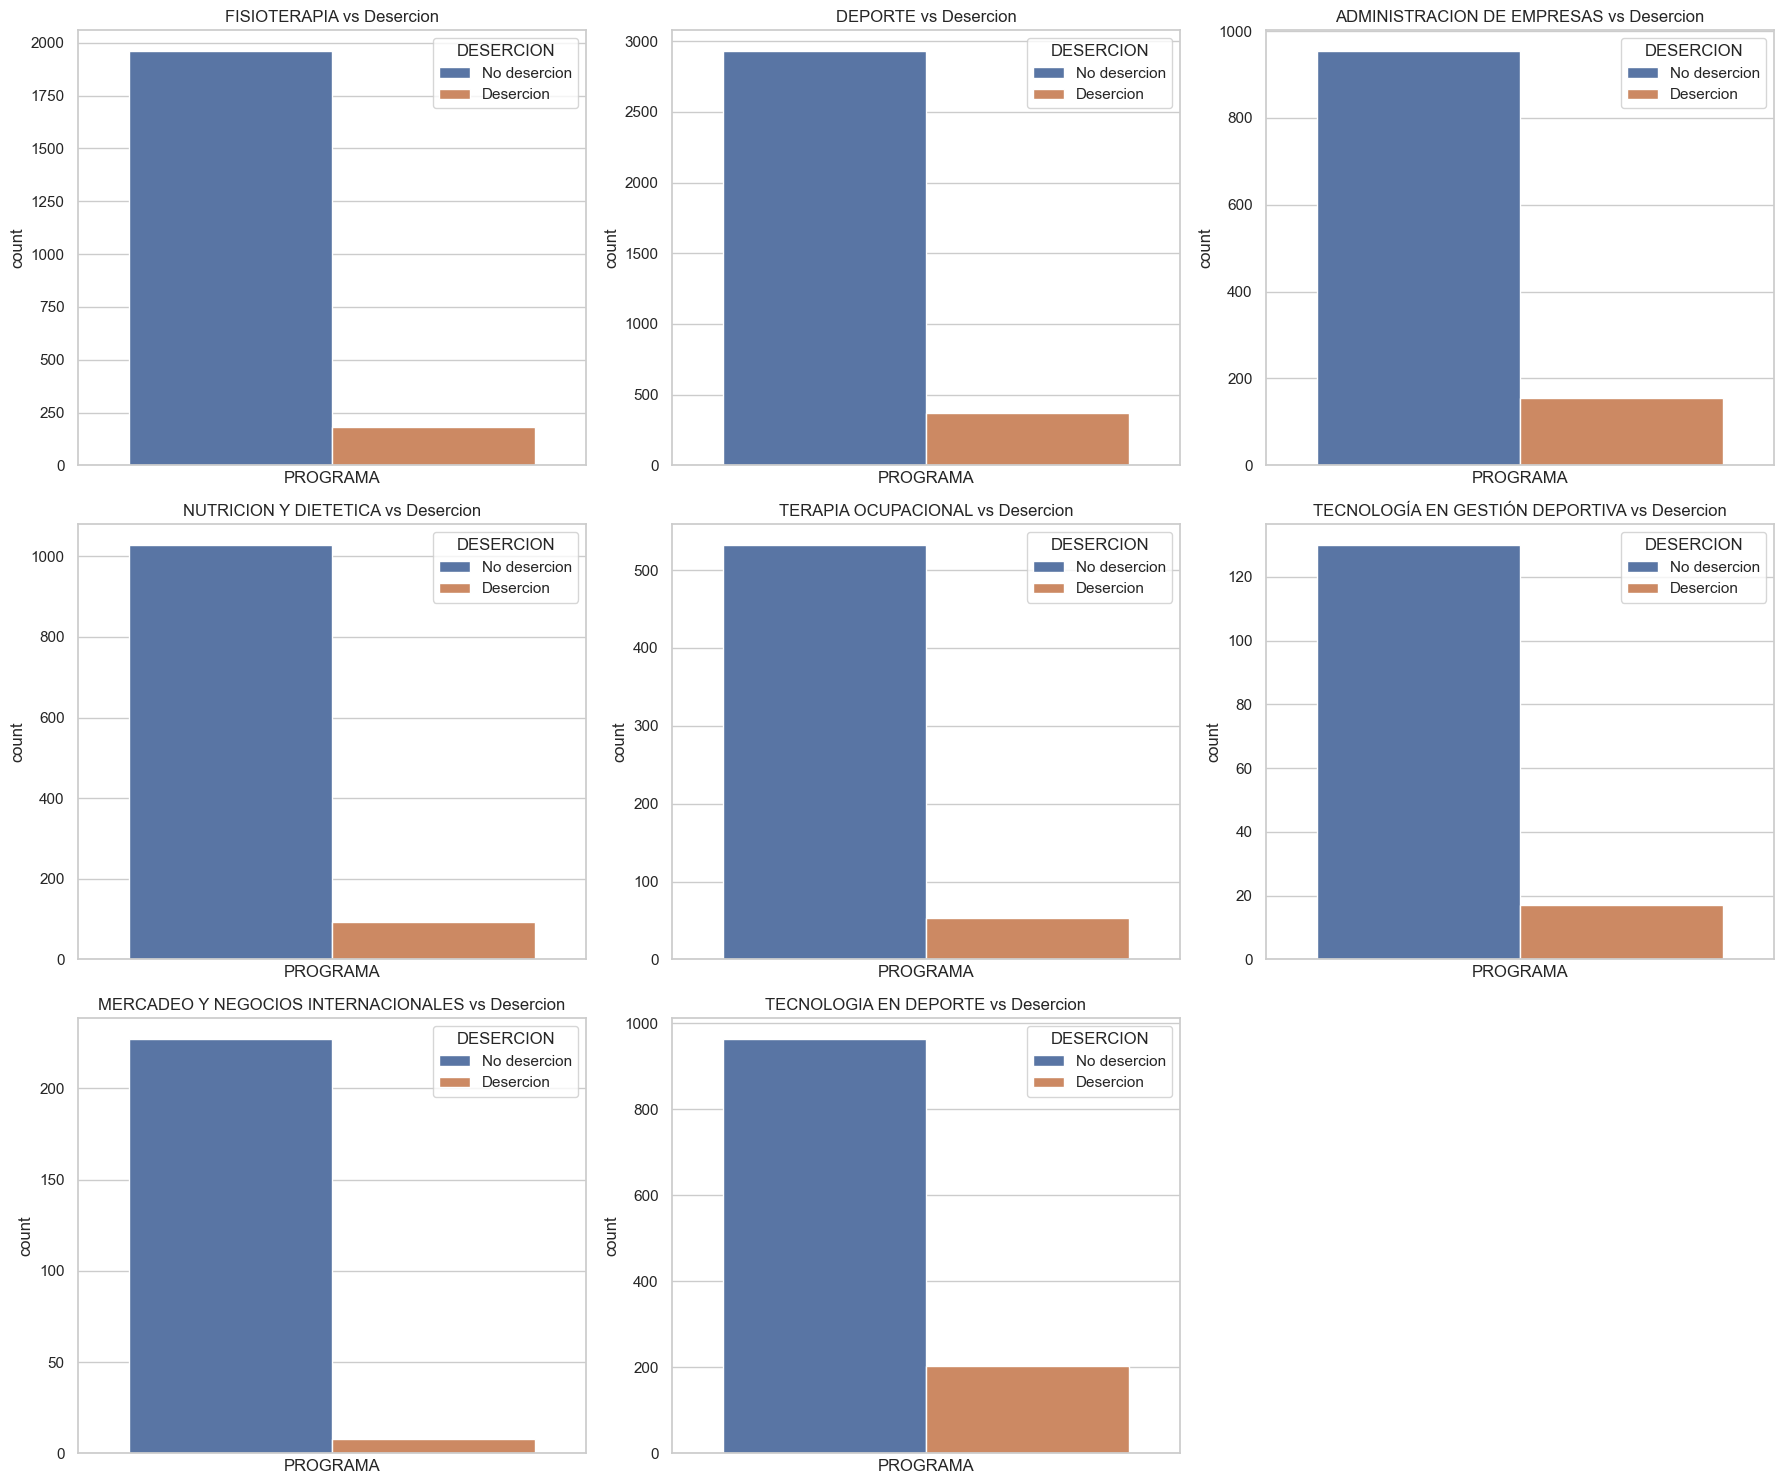

In [24]:
sns.set(style="whitegrid")

unique_programs = df_extracted['PROGRAMA'].unique()

num_columns = 3
num_rows = (len(unique_programs) + num_columns - 1) // num_columns  # Ceiling division

plt.figure(figsize=(18, 5 * num_rows))

for i, program in enumerate(unique_programs):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='PROGRAMA', hue='DESERCION', data=df_extracted[df_extracted['PROGRAMA'] == program])
    plt.title(f'{program} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

plt.show()

In [25]:
sns.set(style="whitegrid")

# Obtener las ciudades únicas
unique_cities = df_extracted['CIUDADRESIDENCIA'].unique()

# Definir el número de columnas y filas para los subplots
num_columns = 3
num_rows = (len(unique_cities) + num_columns - 1) // num_columns 

# Ajustar el tamaño de la figura
plt.figure(figsize=(18, 5 * num_rows))

# Generar los gráficos para cada ciudad
for i, city in enumerate(unique_cities):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='CIUDADRESIDENCIA', hue='DESERCION', data=df_extracted[df_extracted['CIUDADRESIDENCIA'] == city])
    plt.title(f'{city} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [26]:
sns.set(style="whitegrid")

# Obtener las ciudades únicas de nacimiento
unique_cities_nacimiento = df_extracted['CIUDADNACIMIENTO'].unique()

# Definir el número de columnas y filas para los subplots
num_columns = 3
num_rows = (len(unique_cities_nacimiento) + num_columns - 1) // num_columns  # Ceiling division

# Ajustar el tamaño de la figura
plt.figure(figsize=(18, 5 * num_rows))

# Generar los gráficos para cada ciudad de nacimiento
for i, city in enumerate(unique_cities_nacimiento):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x='CIUDADNACIMIENTO', hue='DESERCION', data=df_extracted[df_extracted['CIUDADNACIMIENTO'] == city])
    plt.title(f'{city} vs Desercion')
    plt.xticks([])
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


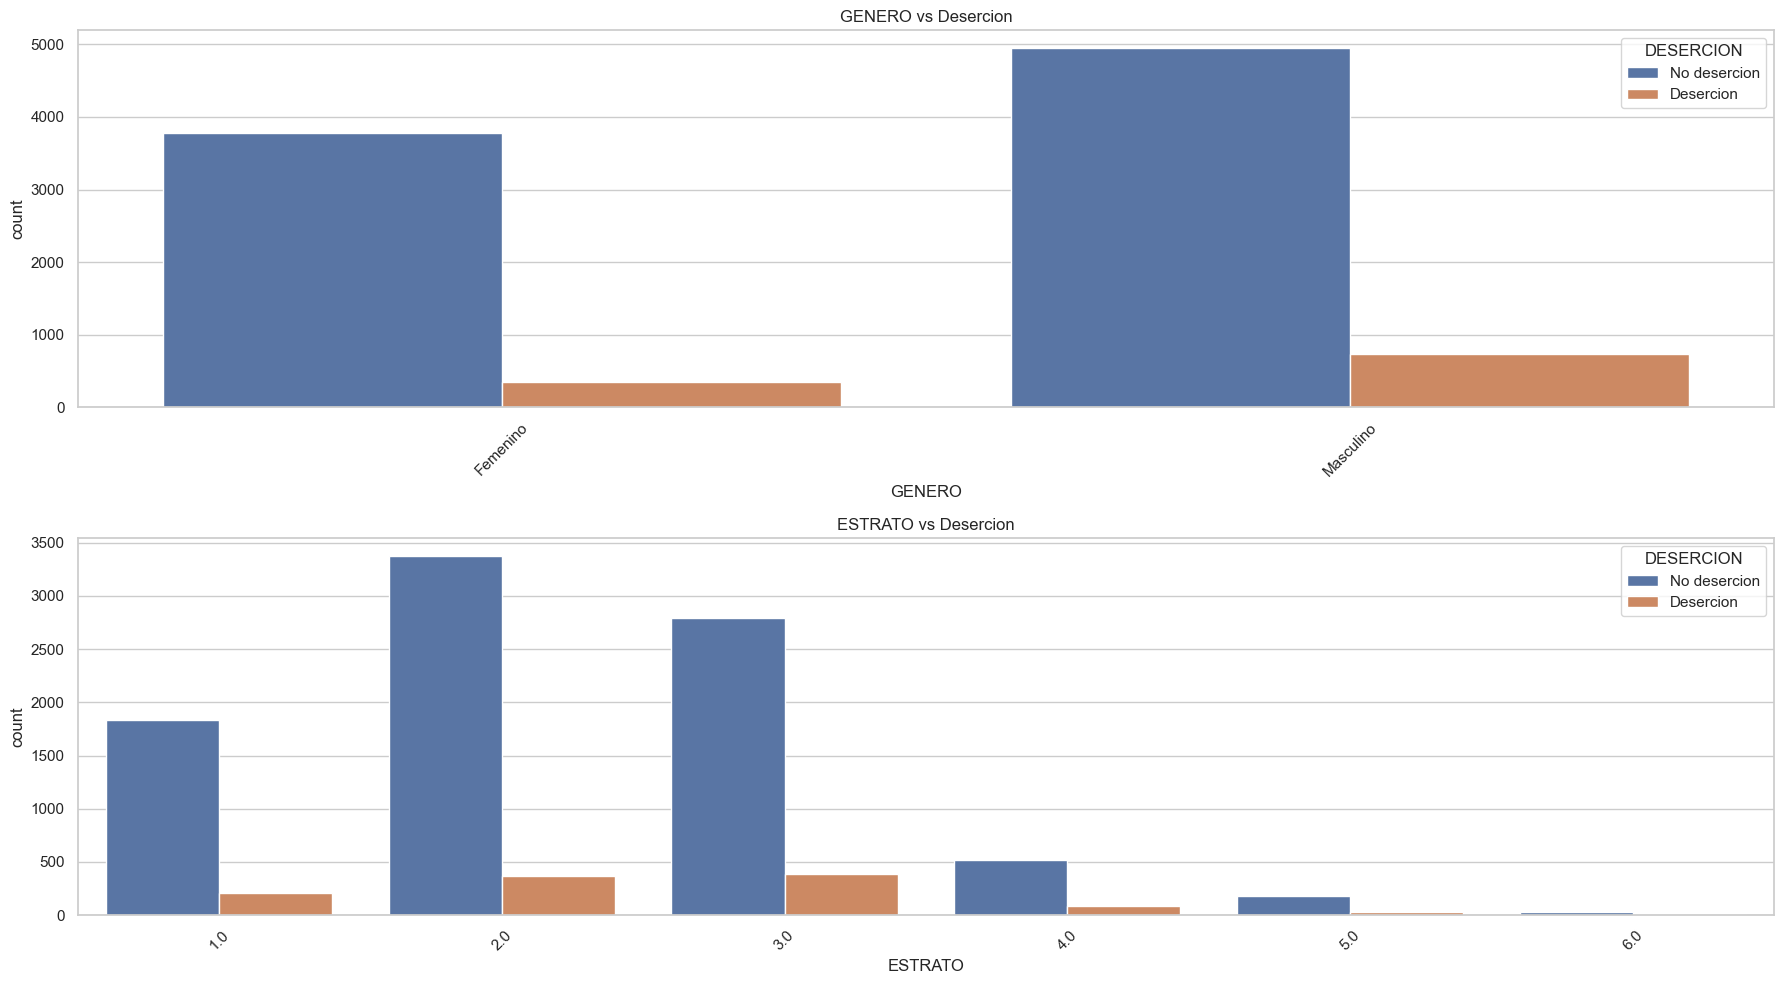

In [27]:
sns.set(style="whitegrid")

categorical_vars = ['GENERO', 'ESTRATO']

plt.figure(figsize=(18, 10)) 

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(x=var, hue='DESERCION', data=df_extracted)
    plt.title(f'{var} vs Desercion')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

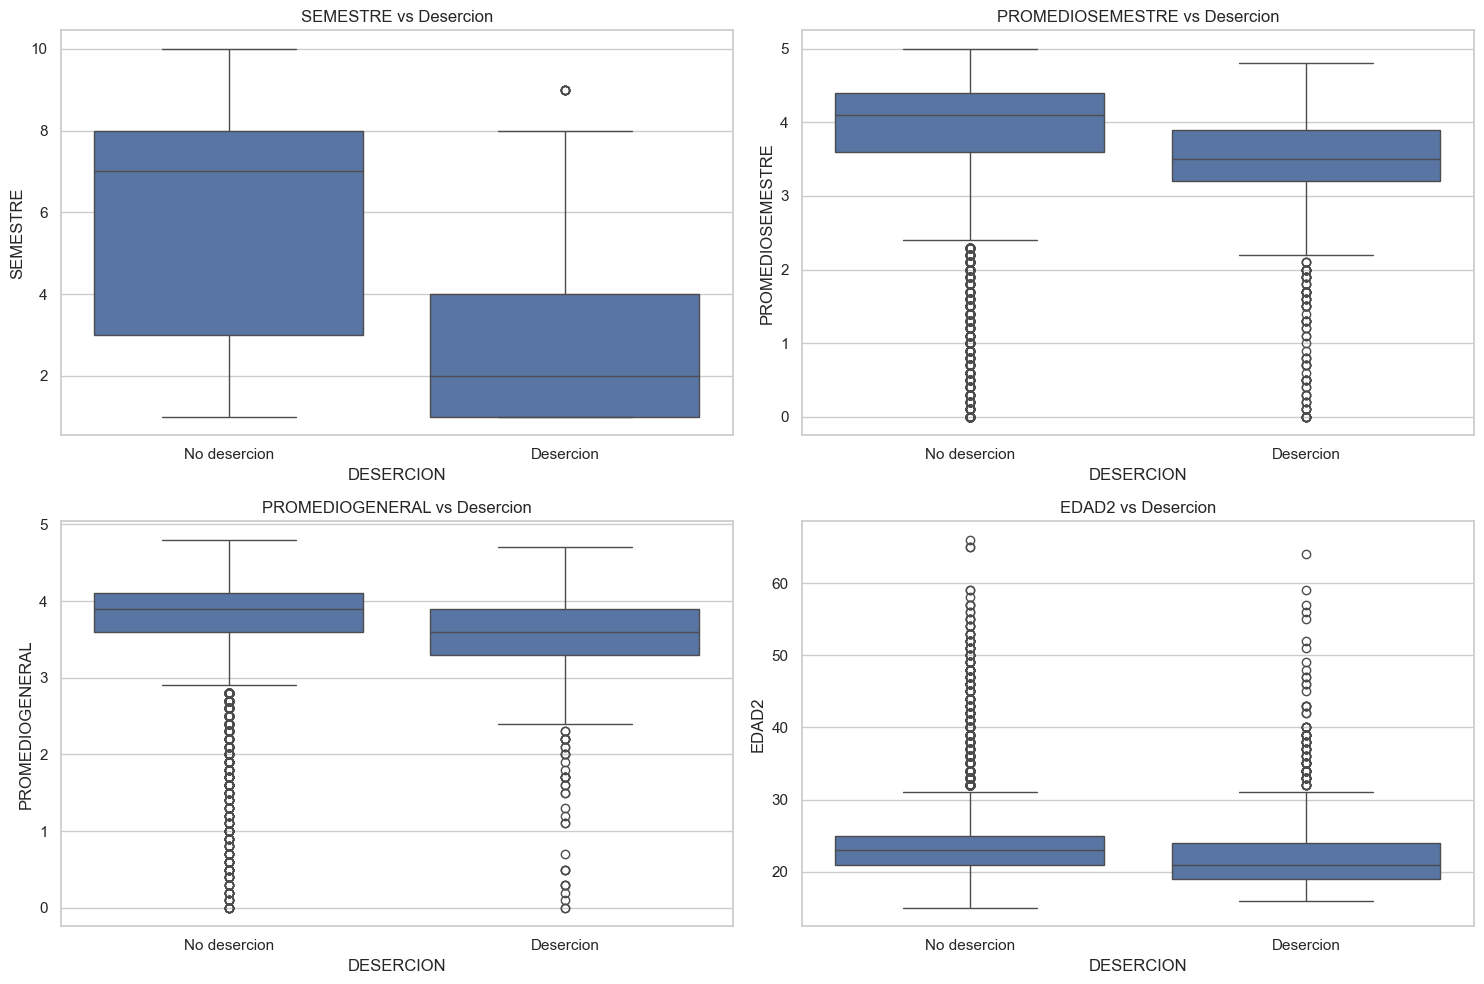

In [28]:
continuous_vars = ['SEMESTRE', 'PROMEDIOSEMESTRE', 'PROMEDIOGENERAL', 'EDAD2']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='DESERCION', y=var, data=df_extracted)
    plt.title(f'{var} vs Desercion')
    plt.tight_layout()

plt.show()

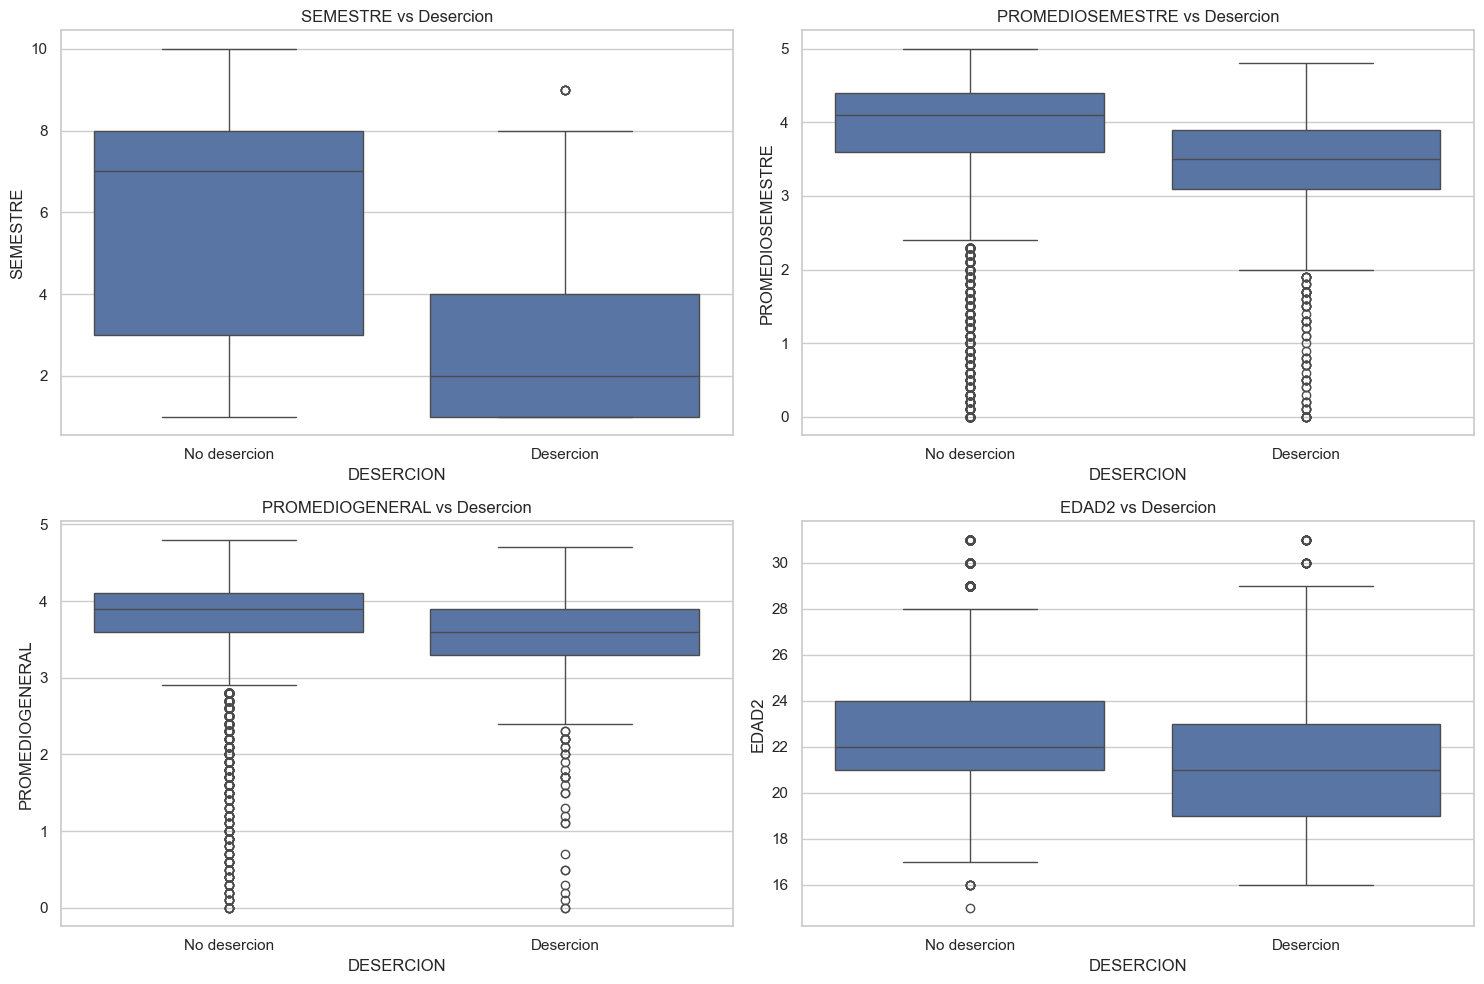

In [29]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for var in continuous_vars:
    df_sinoutliers = remove_outliers(df_extracted, var)

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='DESERCION', y=var, data=df_sinoutliers)
    plt.title(f'{var} vs Desercion')
    plt.tight_layout()

plt.show()

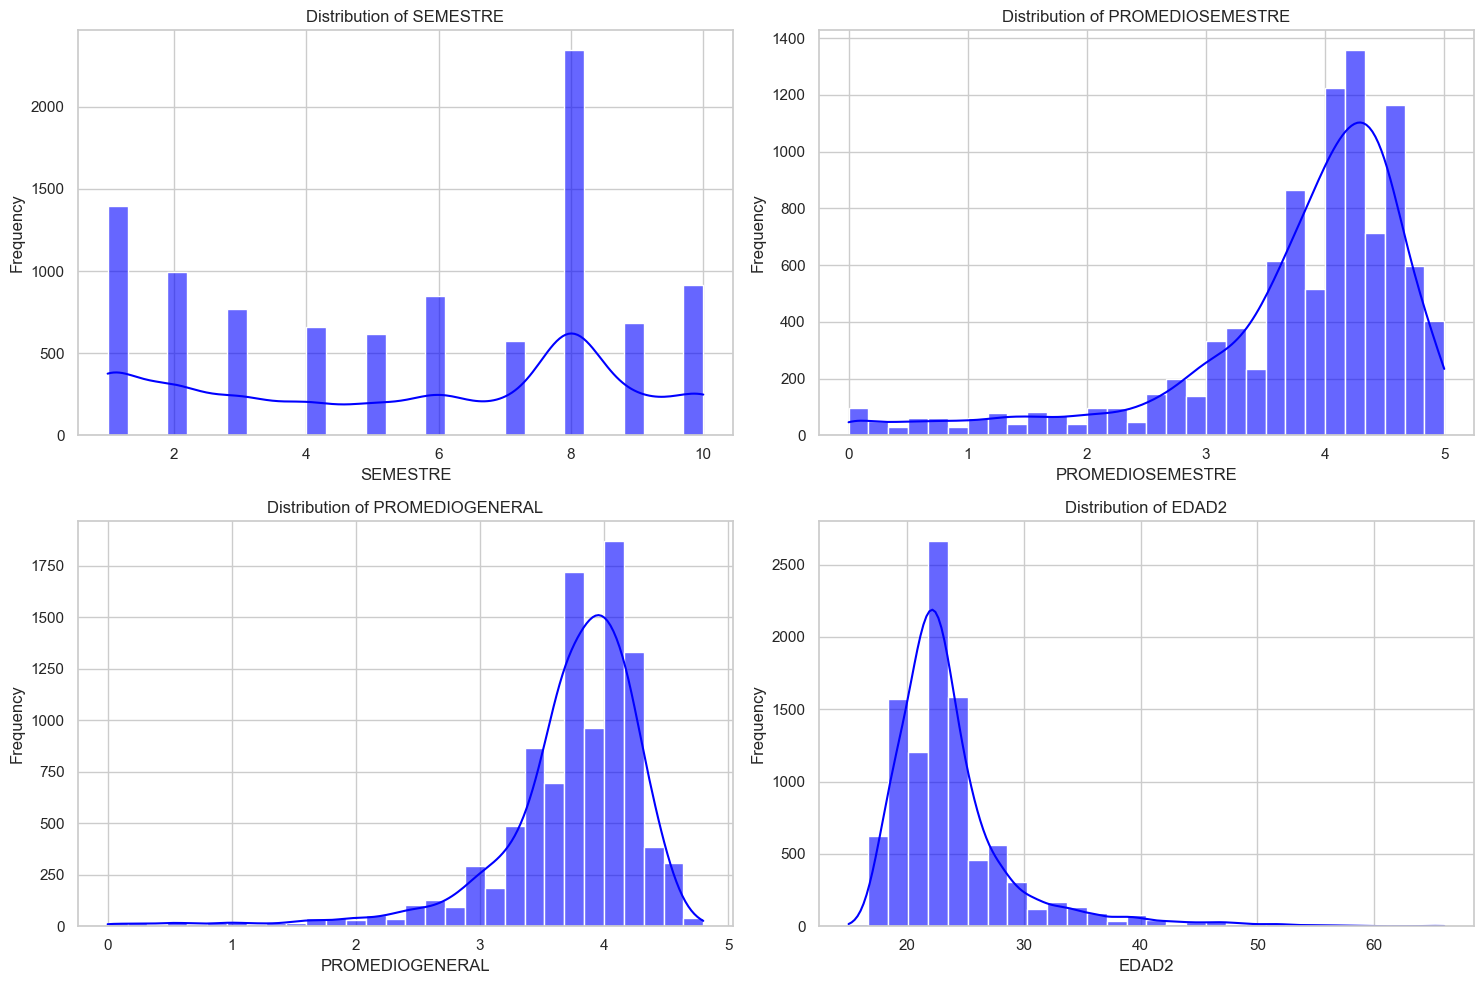

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_extracted[var], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

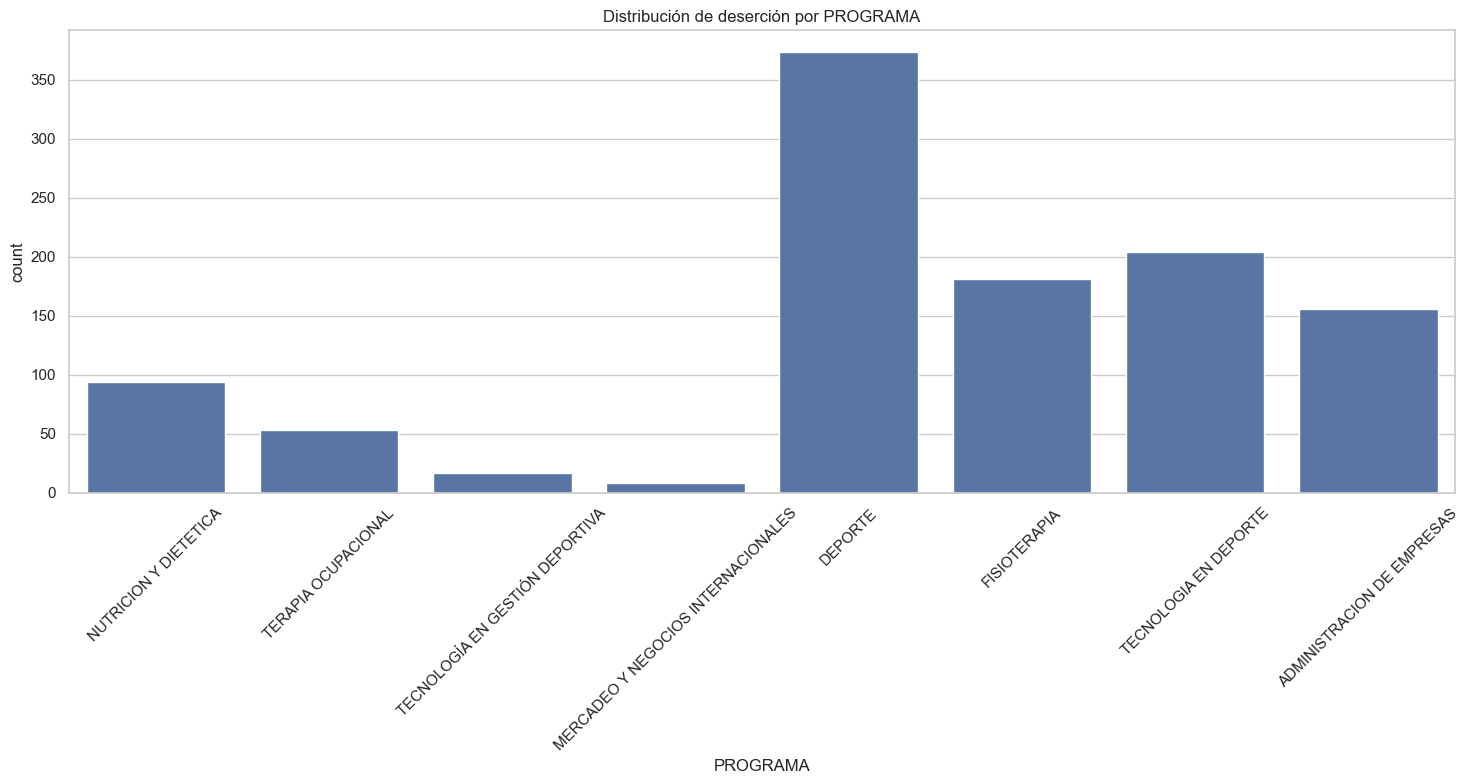

In [31]:
# Filtrar solo los que tienen deserción
df_desercion = df_extracted[df_extracted['DESERCION'] == 'Desercion']

plt.figure(figsize=(15, 8))  # Ajustar el tamaño de la figura

# Generar gráfico de barras para la variable "PROGRAMA" (solo para los que desertaron)
sns.countplot(x='PROGRAMA', data=df_desercion)
plt.title('Distribución de deserción por PROGRAMA')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()

plt.show()


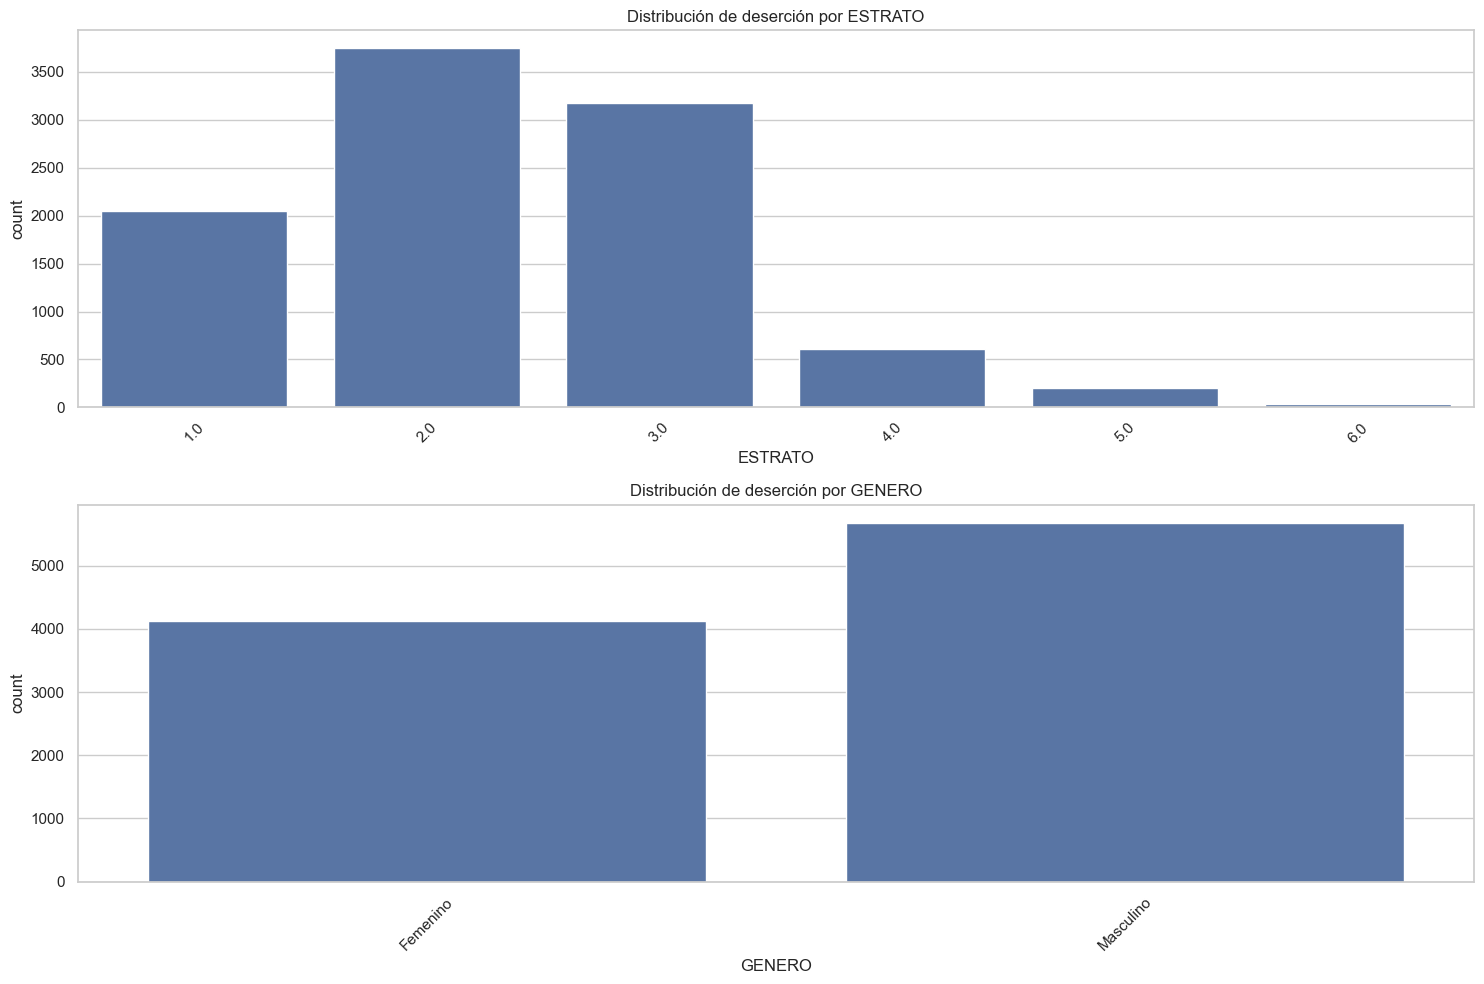

In [32]:
# Filtrar solo los que tienen deserción
df_desercion = df_extracted[df_extracted['DESERCION'] == 'Desercion']

# Listado de variables categóricas de interés
categorical_vars = ['ESTRATO', 'GENERO']

plt.figure(figsize=(15, 5 * len(categorical_vars)))

# Generar gráficos de barras para cada variable categórica (solo para los que desertaron)
for i, var in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars), 1, i + 1)
    sns.countplot(x=var, data=df_extracted)
    plt.title(f'Distribución de deserción por {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



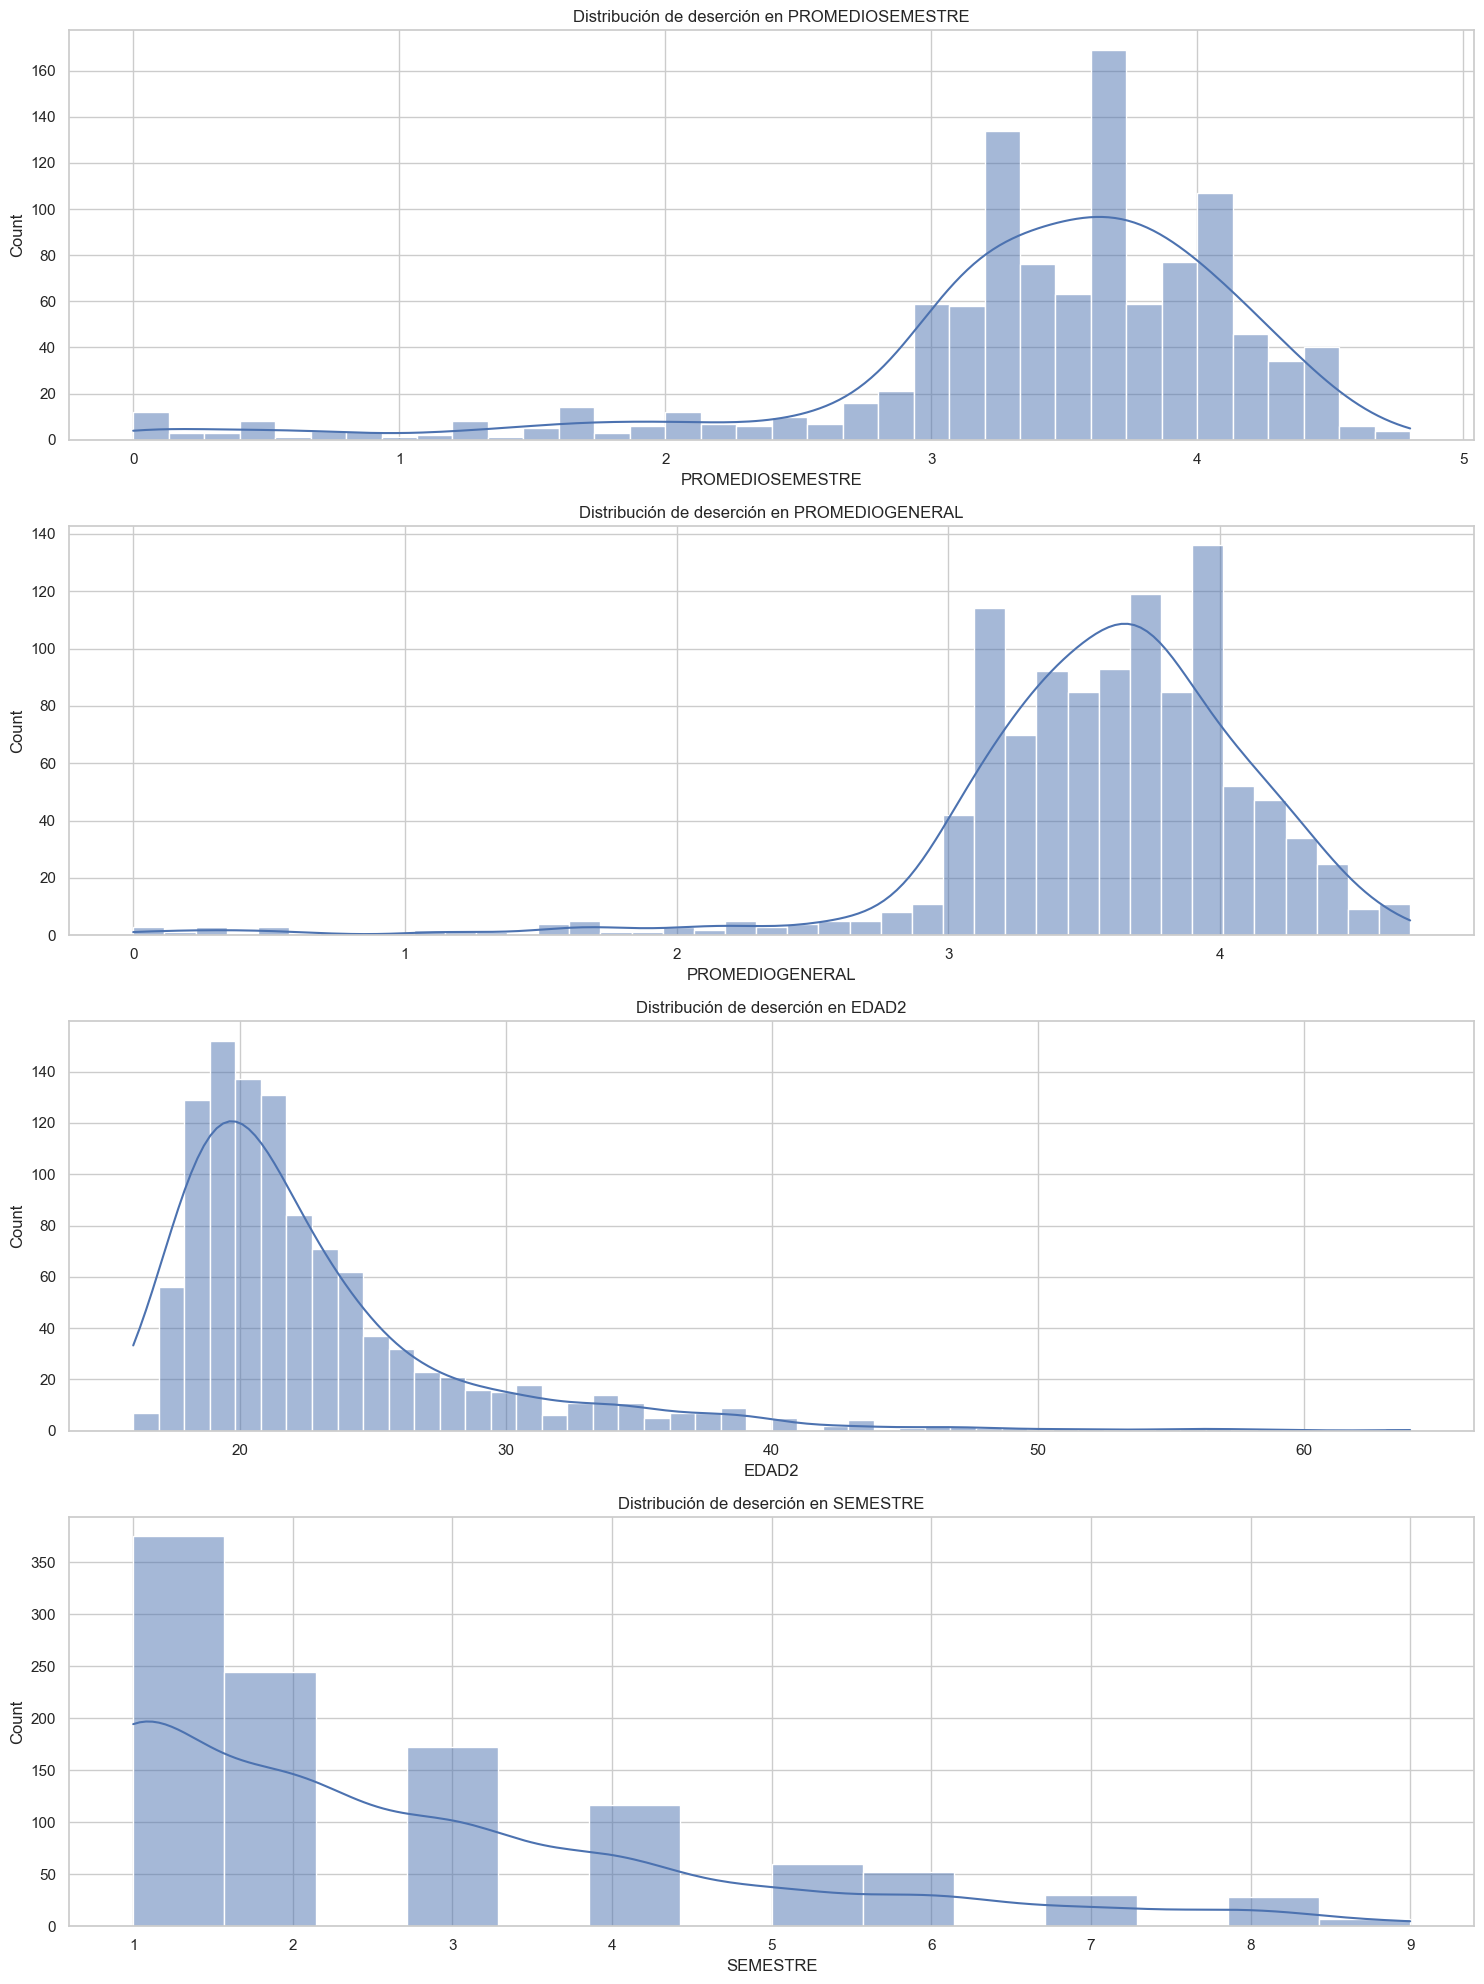

In [35]:
# Listado de variables numéricas de interés
numerical_vars = ['PROMEDIOSEMESTRE', 'PROMEDIOGENERAL', 'EDAD2', 'SEMESTRE']

plt.figure(figsize=(15, 5 * len(numerical_vars)))

# Generar gráficos de densidad para cada variable numérica (solo para los que desertaron)
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i + 1)
    sns.histplot(df_desercion[var], kde=True)
    plt.title(f'Distribución de deserción en {var}')
    plt.tight_layout()

plt.show()

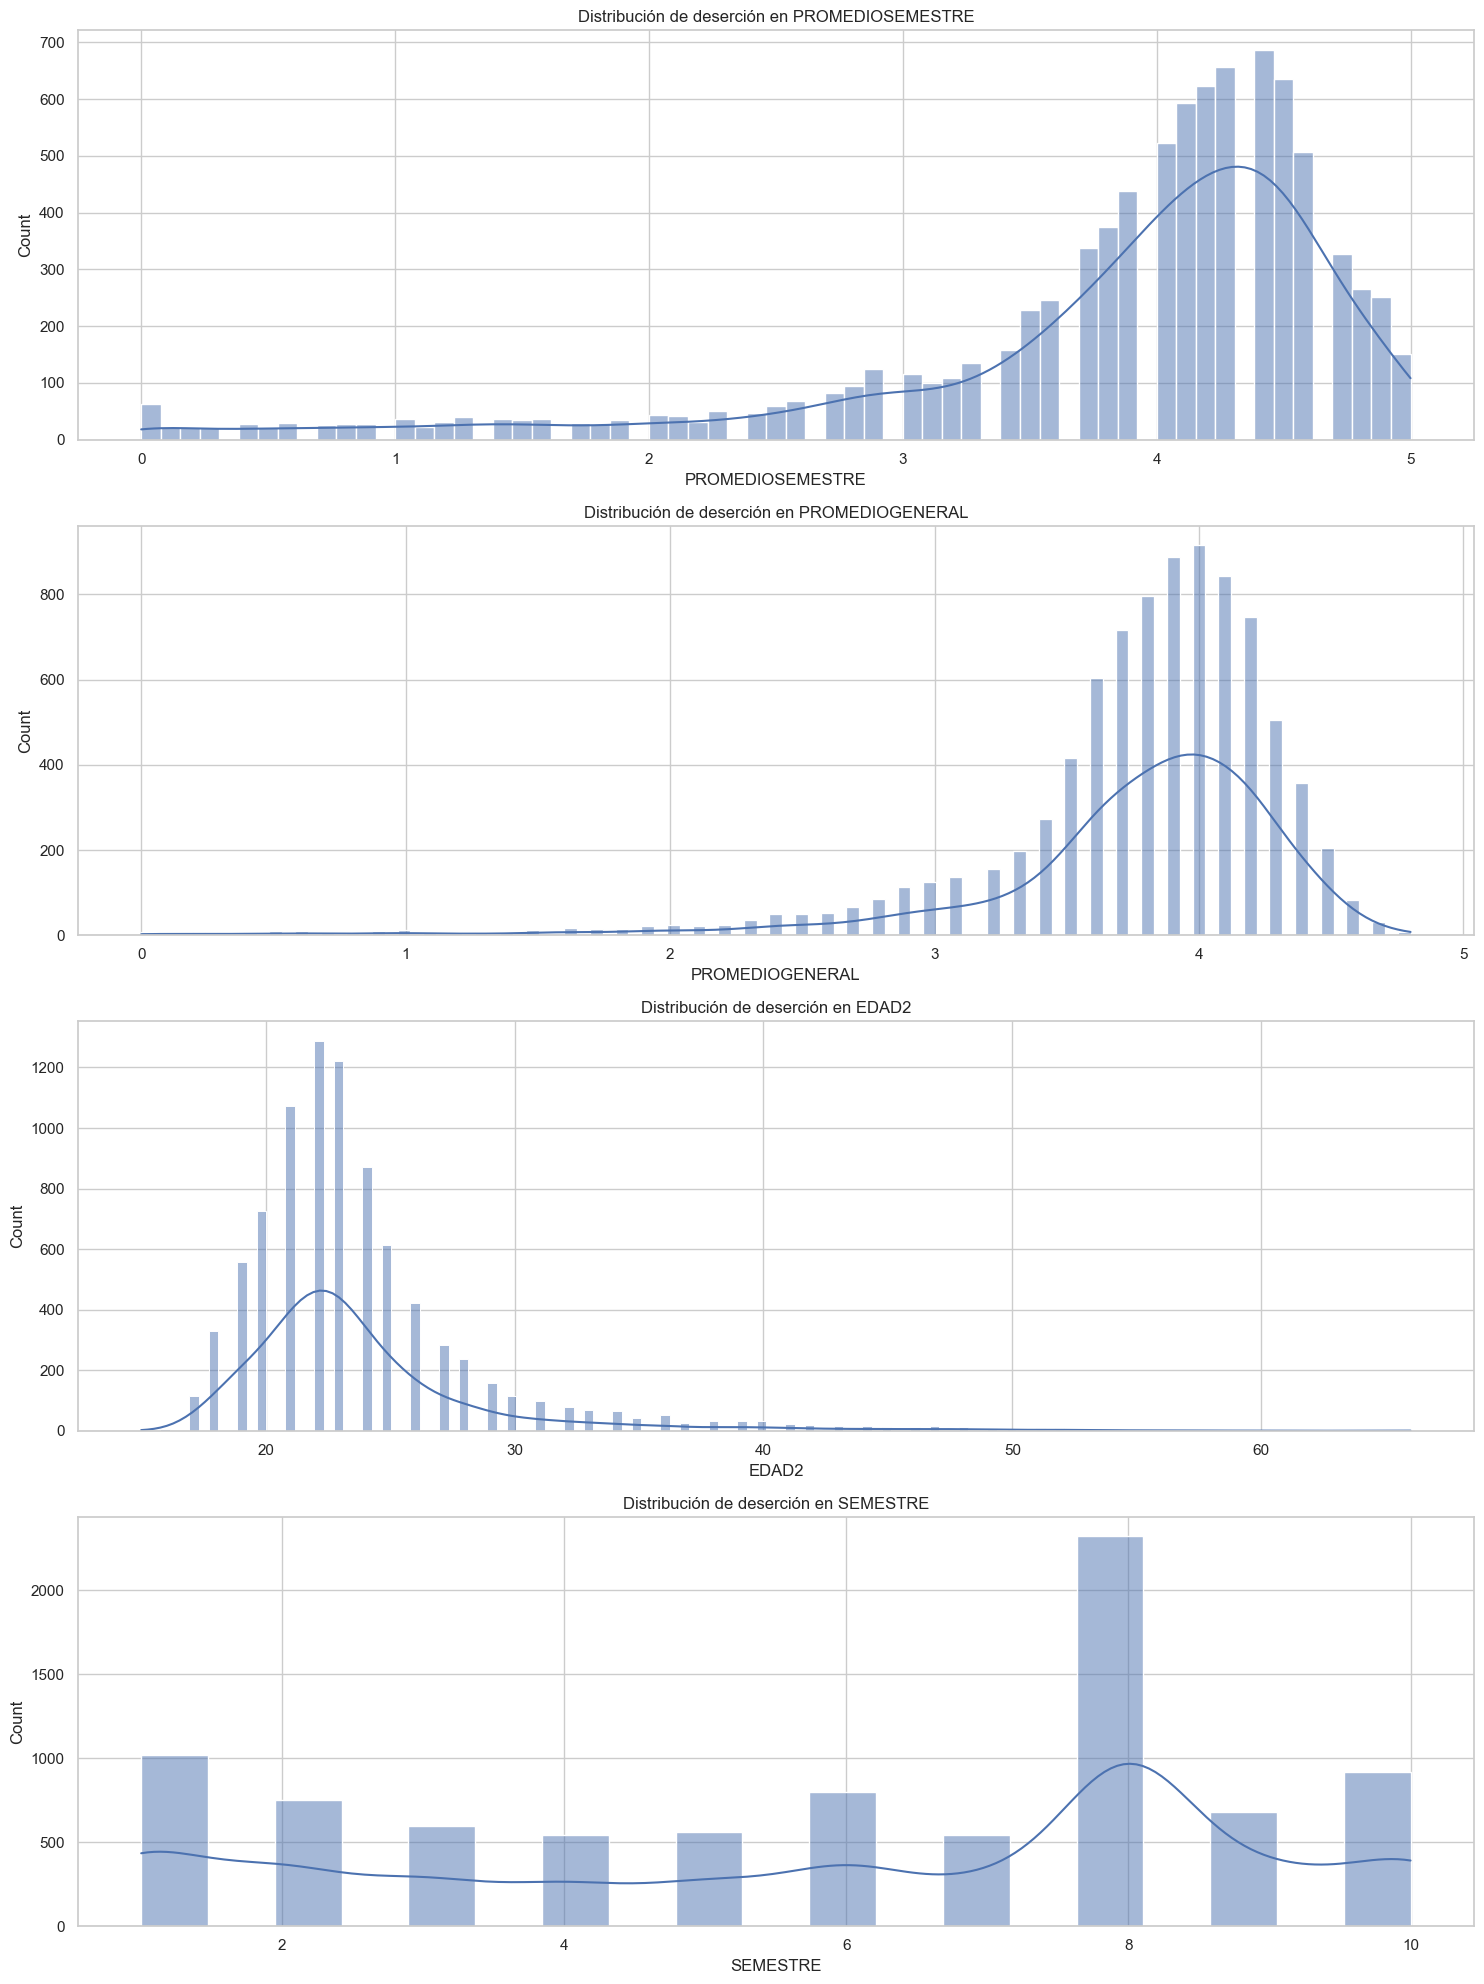

In [38]:
df_nodesercion = df_extracted[df_extracted['DESERCION'] == 'No desercion']

# Listado de variables numéricas de interés
numerical_vars = ['PROMEDIOSEMESTRE', 'PROMEDIOGENERAL', 'EDAD2', 'SEMESTRE']

plt.figure(figsize=(15, 5 * len(numerical_vars)))

# Generar gráficos de densidad para cada variable numérica (solo para los que desertaron)
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i + 1)
    sns.histplot(df_nodesercion[var], kde=True)
    plt.title(f'Distribución de deserción en {var}')
    plt.tight_layout()

plt.show()

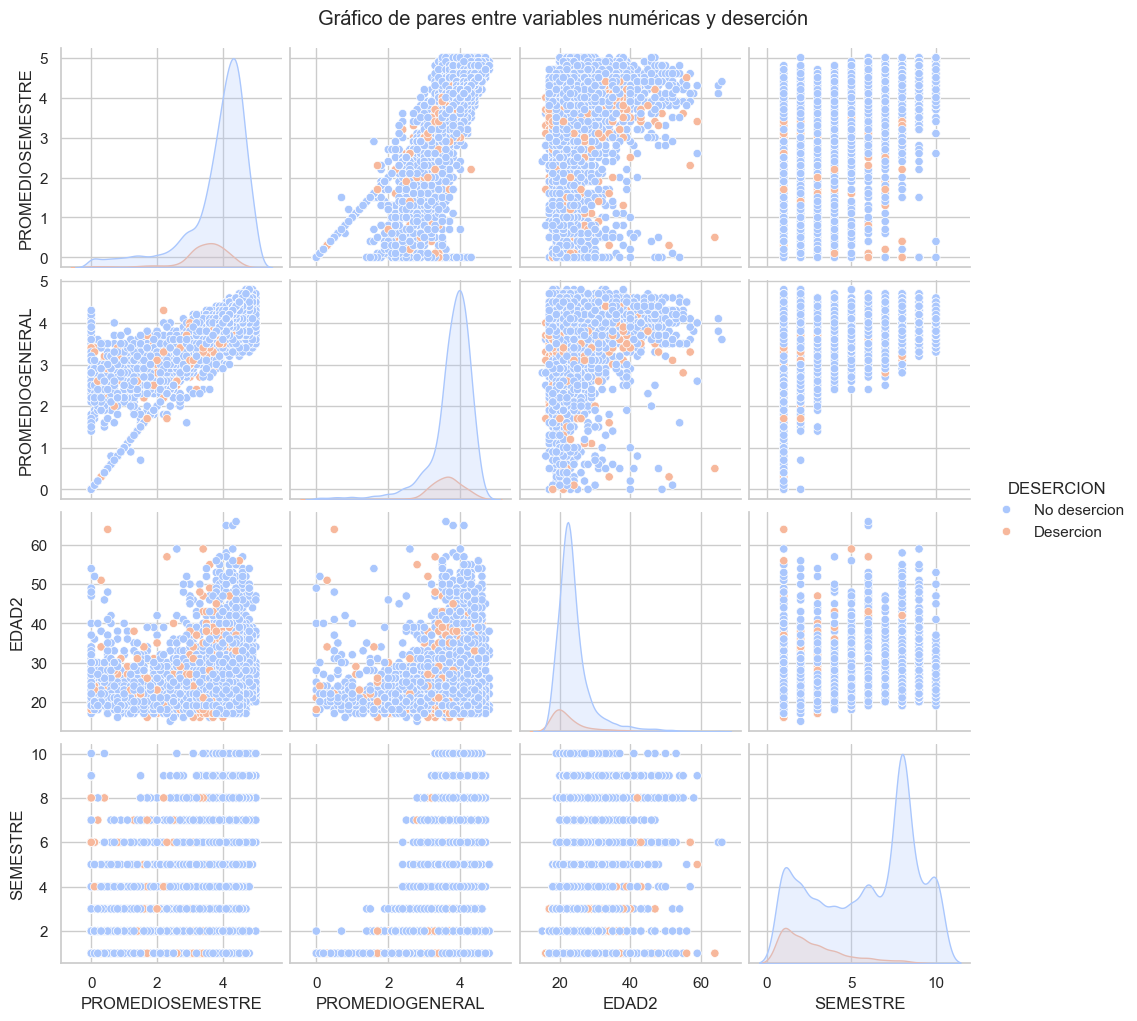

In [39]:
# Añadir "SEMESTRE" a la lista de variables numéricas si no está ya en ella
if 'SEMESTRE' not in numerical_vars:
    numerical_vars.append('SEMESTRE')

# Crear el pairplot con las variables numéricas y el semestre
sns.pairplot(df_extracted, vars=numerical_vars, hue='DESERCION', palette='coolwarm')
plt.suptitle('Gráfico de pares entre variables numéricas y deserción', y=1.02)
plt.show()
